In [1]:
!pip install -q umap-learn

You should consider upgrading via the 'c:\users\david\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
# Preprocesado y modelado
import umap


In [4]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(10)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [5]:
X=datos.values
scaler = StandardScaler()
X_new=scaler.fit_transform(X)
print(X_new.shape)

(50, 4)


In [6]:
# Aplicar UMAP
#reducer = umap.UMAP() # Default
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='minkowski')

In [7]:
embedding = reducer.fit_transform(X_new)

In [8]:
tabla_final=pd.DataFrame(embedding,columns=['PC1','PC2'])
tabla_final['State']=datos.index
tabla_final.head()

,PC1,PC2,State
0,5.651121,14.580683,Alabama
1,5.524055,12.840647,Alaska
2,6.383023,13.235926,Arizona
3,9.029000,15.306950,Arkansas
4,6.239277,12.819141,California


Text(0, 0.5, 'PC2')

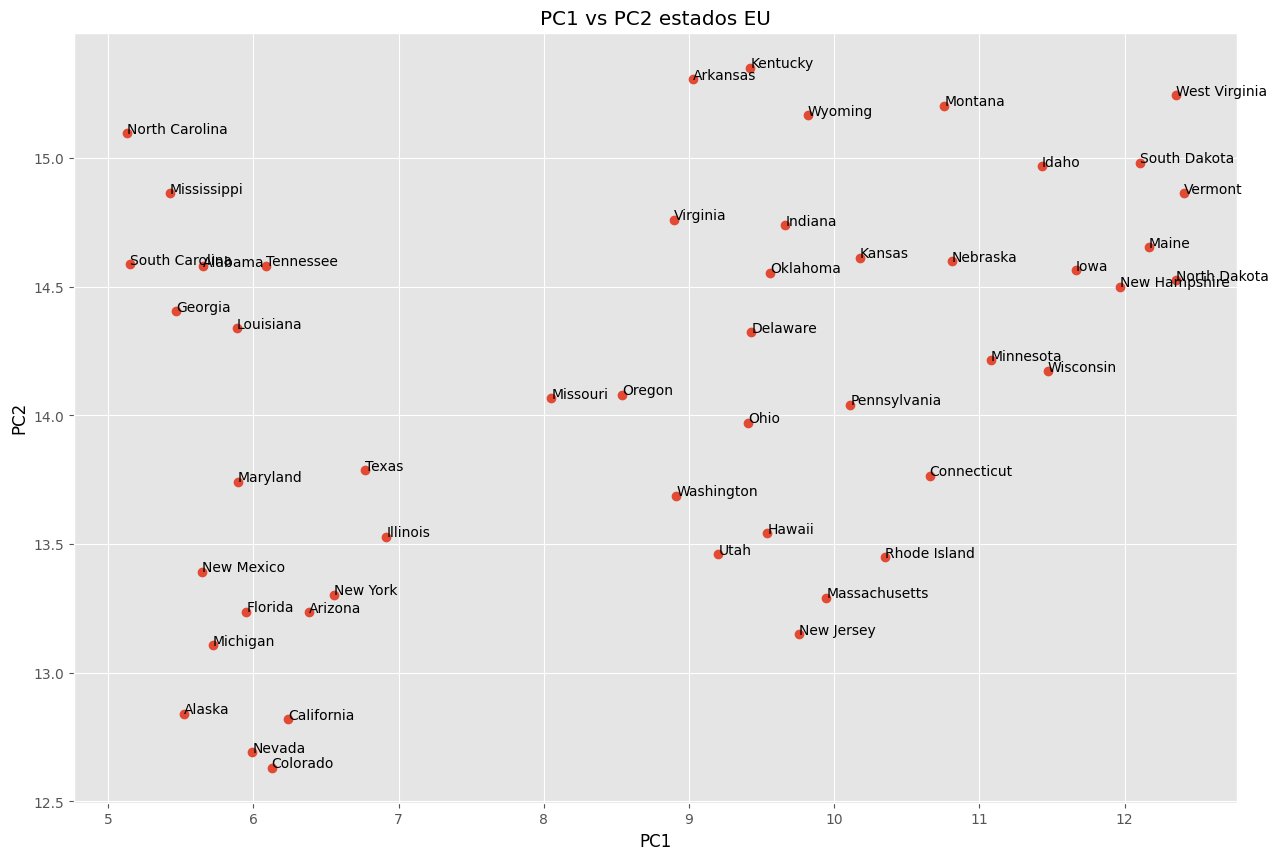

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))

ax = tabla_final.set_index('PC1')['PC2'].plot(style='o')
def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'State': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['State']))

label_point(tabla_final.PC1, tabla_final.PC2, tabla_final.State, ax)
#plt.axvline(x=0,color='black')
#plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')